<a href="https://colab.research.google.com/github/nayelhashmi2000/DeepLearning/blob/master/CvD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 358kB 23.0MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.0MB 28.2MB/s 
     |████████████████████████████████| 40kB 5.1MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 2.6MB 34.7MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *


In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 5.9MB 5.0MB/s 
     |████████████████████████████████| 184kB 46.0MB/s 
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [11]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [12]:
fns=get_image_files("/content/drive/My Drive/datasets/cvd/")

In [13]:
Cvd = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label)




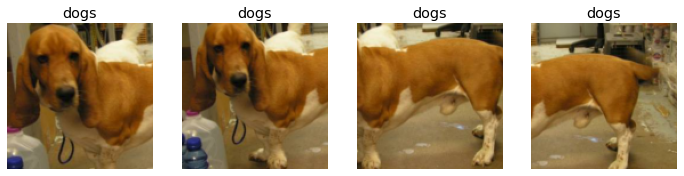

In [14]:
Cvd = Cvd.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Cvd.dataloaders("/content/drive/My Drive/datasets/cvd/")
dls.train.show_batch(max_n=4, nrows=1, unique=True)

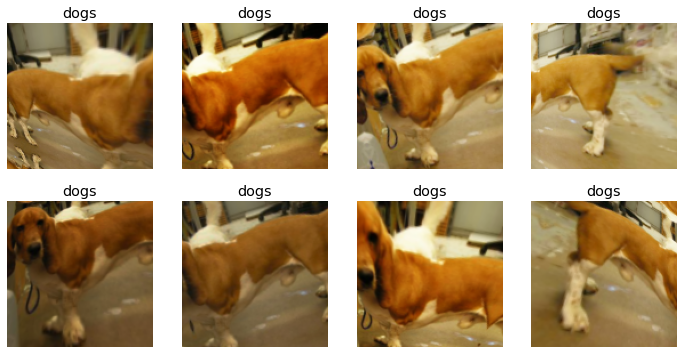

In [15]:
Cvd = Cvd.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=2))
dls = Cvd.dataloaders("/content/drive/My Drive/datasets/cvd/")
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
Cvd = Cvd.new(
item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms())
dls = Cvd.dataloaders("/content/drive/My Drive/datasets/cvd/")

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.765581,0.119606,0.025000,02:10


epoch,train_loss,valid_loss,error_rate,time
0,0.222280,0.072119,0.025000,01:07
1,0.191872,0.071039,0.037500,01:07
2,0.140319,0.076479,0.025000,01:07
3,0.120687,0.077366,0.025000,01:07


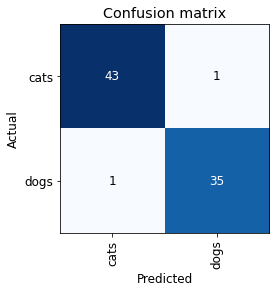

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

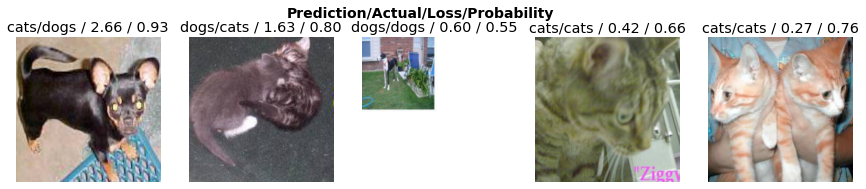

In [19]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

TypeError: ignored

In [26]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [21]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [22]:
img = PILImage.create(btn_upload.data[-1])

In [23]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
btn_run = widgets.Button(description='Classify')
btn_run
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [36]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your image'), 
      btn_upload, btn_run, out_pl, lbl_pred])